<a href="https://colab.research.google.com/github/omniaghazy/Heart_Disease_Project/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('selected_features_data.csv')

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_reg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42) # probability=True عشان الـROC Curve

log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

print("تم تدريب المودلز بنجاح.")

تم تدريب المودلز بنجاح.


--- Logistic Regression ---
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-Score: 0.84
--- Decision Tree ---
Accuracy: 0.72
Precision: 0.71
Recall: 0.78
F1-Score: 0.75
--- Random Forest ---
Accuracy: 0.84
Precision: 0.87
Recall: 0.81
F1-Score: 0.84
--- SVM ---
Accuracy: 0.80
Precision: 0.81
Recall: 0.81
F1-Score: 0.81


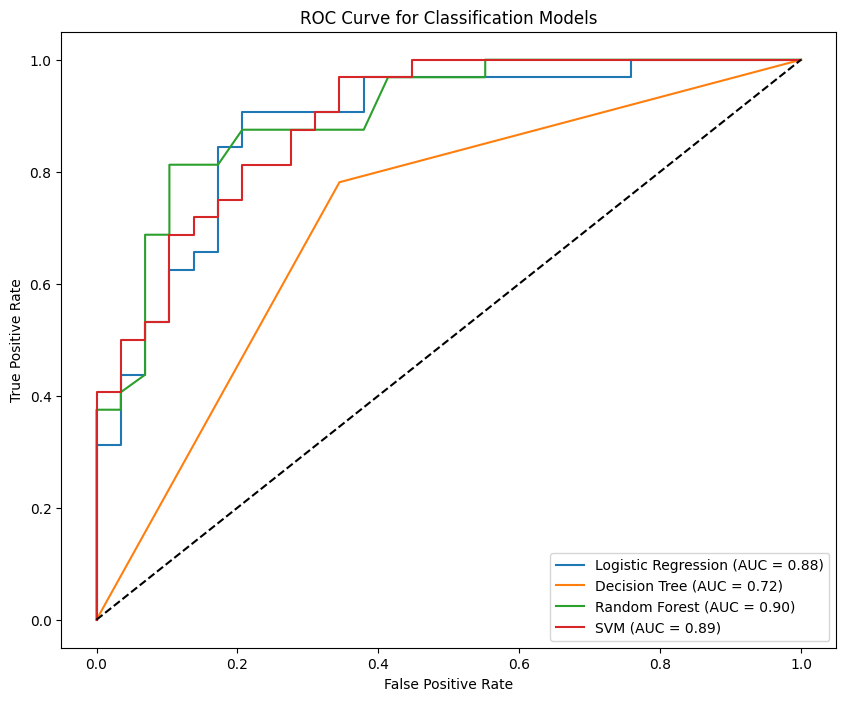

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = [log_reg_model, dt_model, rf_model, svm_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# حلقة لتقييم كل مودل
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    # حساب المقاييس
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # طباعة النتائج
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

# رسم الـROC Curve
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Models')
plt.legend(loc='lower right')
plt.show()

In [6]:
import joblib

# حفظ أفضل مودل
joblib.dump(rf_model, '../content/random_forest_model.pkl')

print("تم حفظ المودل بنجاح في مجلد 'models'.")

تم حفظ المودل بنجاح في مجلد 'models'.
